# Heart Disease Prediction

Во овој проект го користам датасетот од Kaggle -https://www.kaggle.com/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv.
Ќе користиме различни методи и алгоритми од машинско учење со цел да предвидиме дали дадена личност страда од заболување на срцето.

### Вчитување на потребни датотеки

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Вчитување на датасет и негово разгледување со цел донесување на заклучоци

In [73]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Statstical Details Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.

#### Објаснување на 13 - те карактеристики (features)

Content
There are 13 attributes

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
 -- Value 0: typical angina
  -- Value 1: atypical angina
     -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
** -- Value 0: normal
** -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
** -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
st dpression se odnesuva na toa koga pri pravenje na ecg, vo ST segmentot se dobivaat signali koi se pod normalnite granici.
(ako vrema vrednost najmalce 2 ili nad 2 pri pravenje na stres test togash idicira reversible ischaemia)
* slope: the slope of the peak exercise ST segment
** -- Value 0: upsloping
** -- Value 1: flat
** -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

In [30]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


Забележуваме дека во датасетот нема податоци за кои имаме вредност 0.
Затоа нема потреба од исфрлање на податоци или пополнување на вредностите кои недостасуваат

### Барање на зависност помеѓу атрибутите

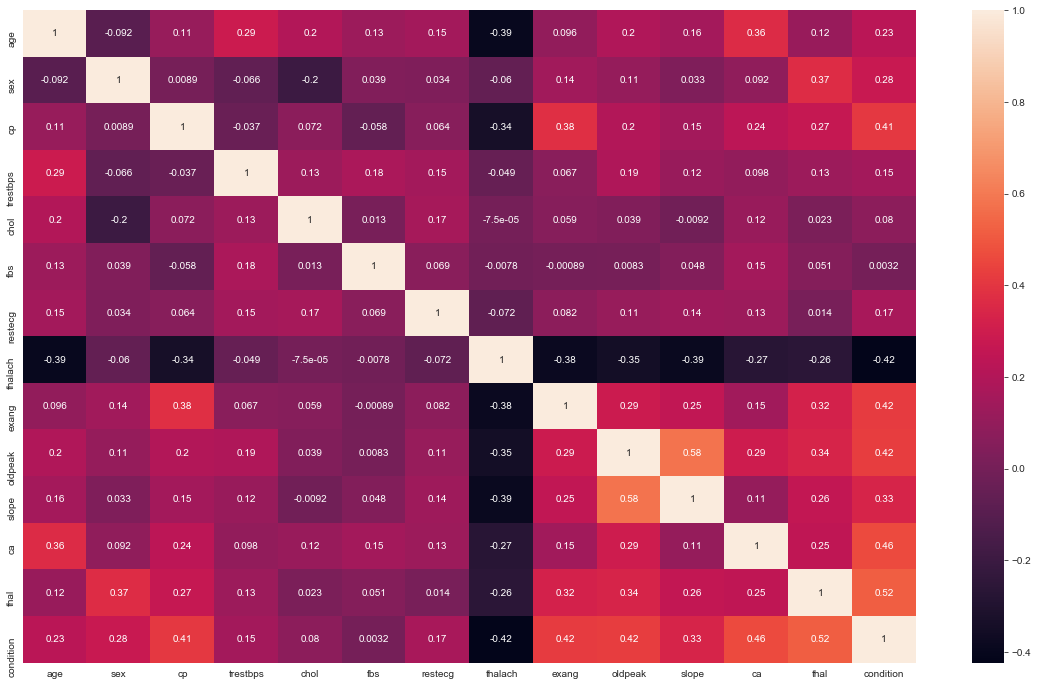

In [75]:
import seaborn as sns
plt.figure(figsize=(20,12))
g=sns.heatmap(df.corr(),annot=True)

Од мапата можеме на забележиме кои карактеристики (features) имаат влијание врз тоа дали ќе се појави срцева болест или не. Од мапата се гледа дека сите имаат позитивни коефициенти, освен thalach(максимален број на срцеви отчукување, односно максимален пулс кој се достигнува при некоја физичка активност) кој има негативен коефициент. 
Да го земеме на пример cp - cheast pain, значи ако има болка во градите поголема е веројатноста да се јави срцево заболување, бидејќи коефициентот е 0.41.
Исто така и exang, oldpeak и ca имаат коефициенти по 0.5.
Најголемо влијание од сите карактеристики има thal со коефициент од 0.52.

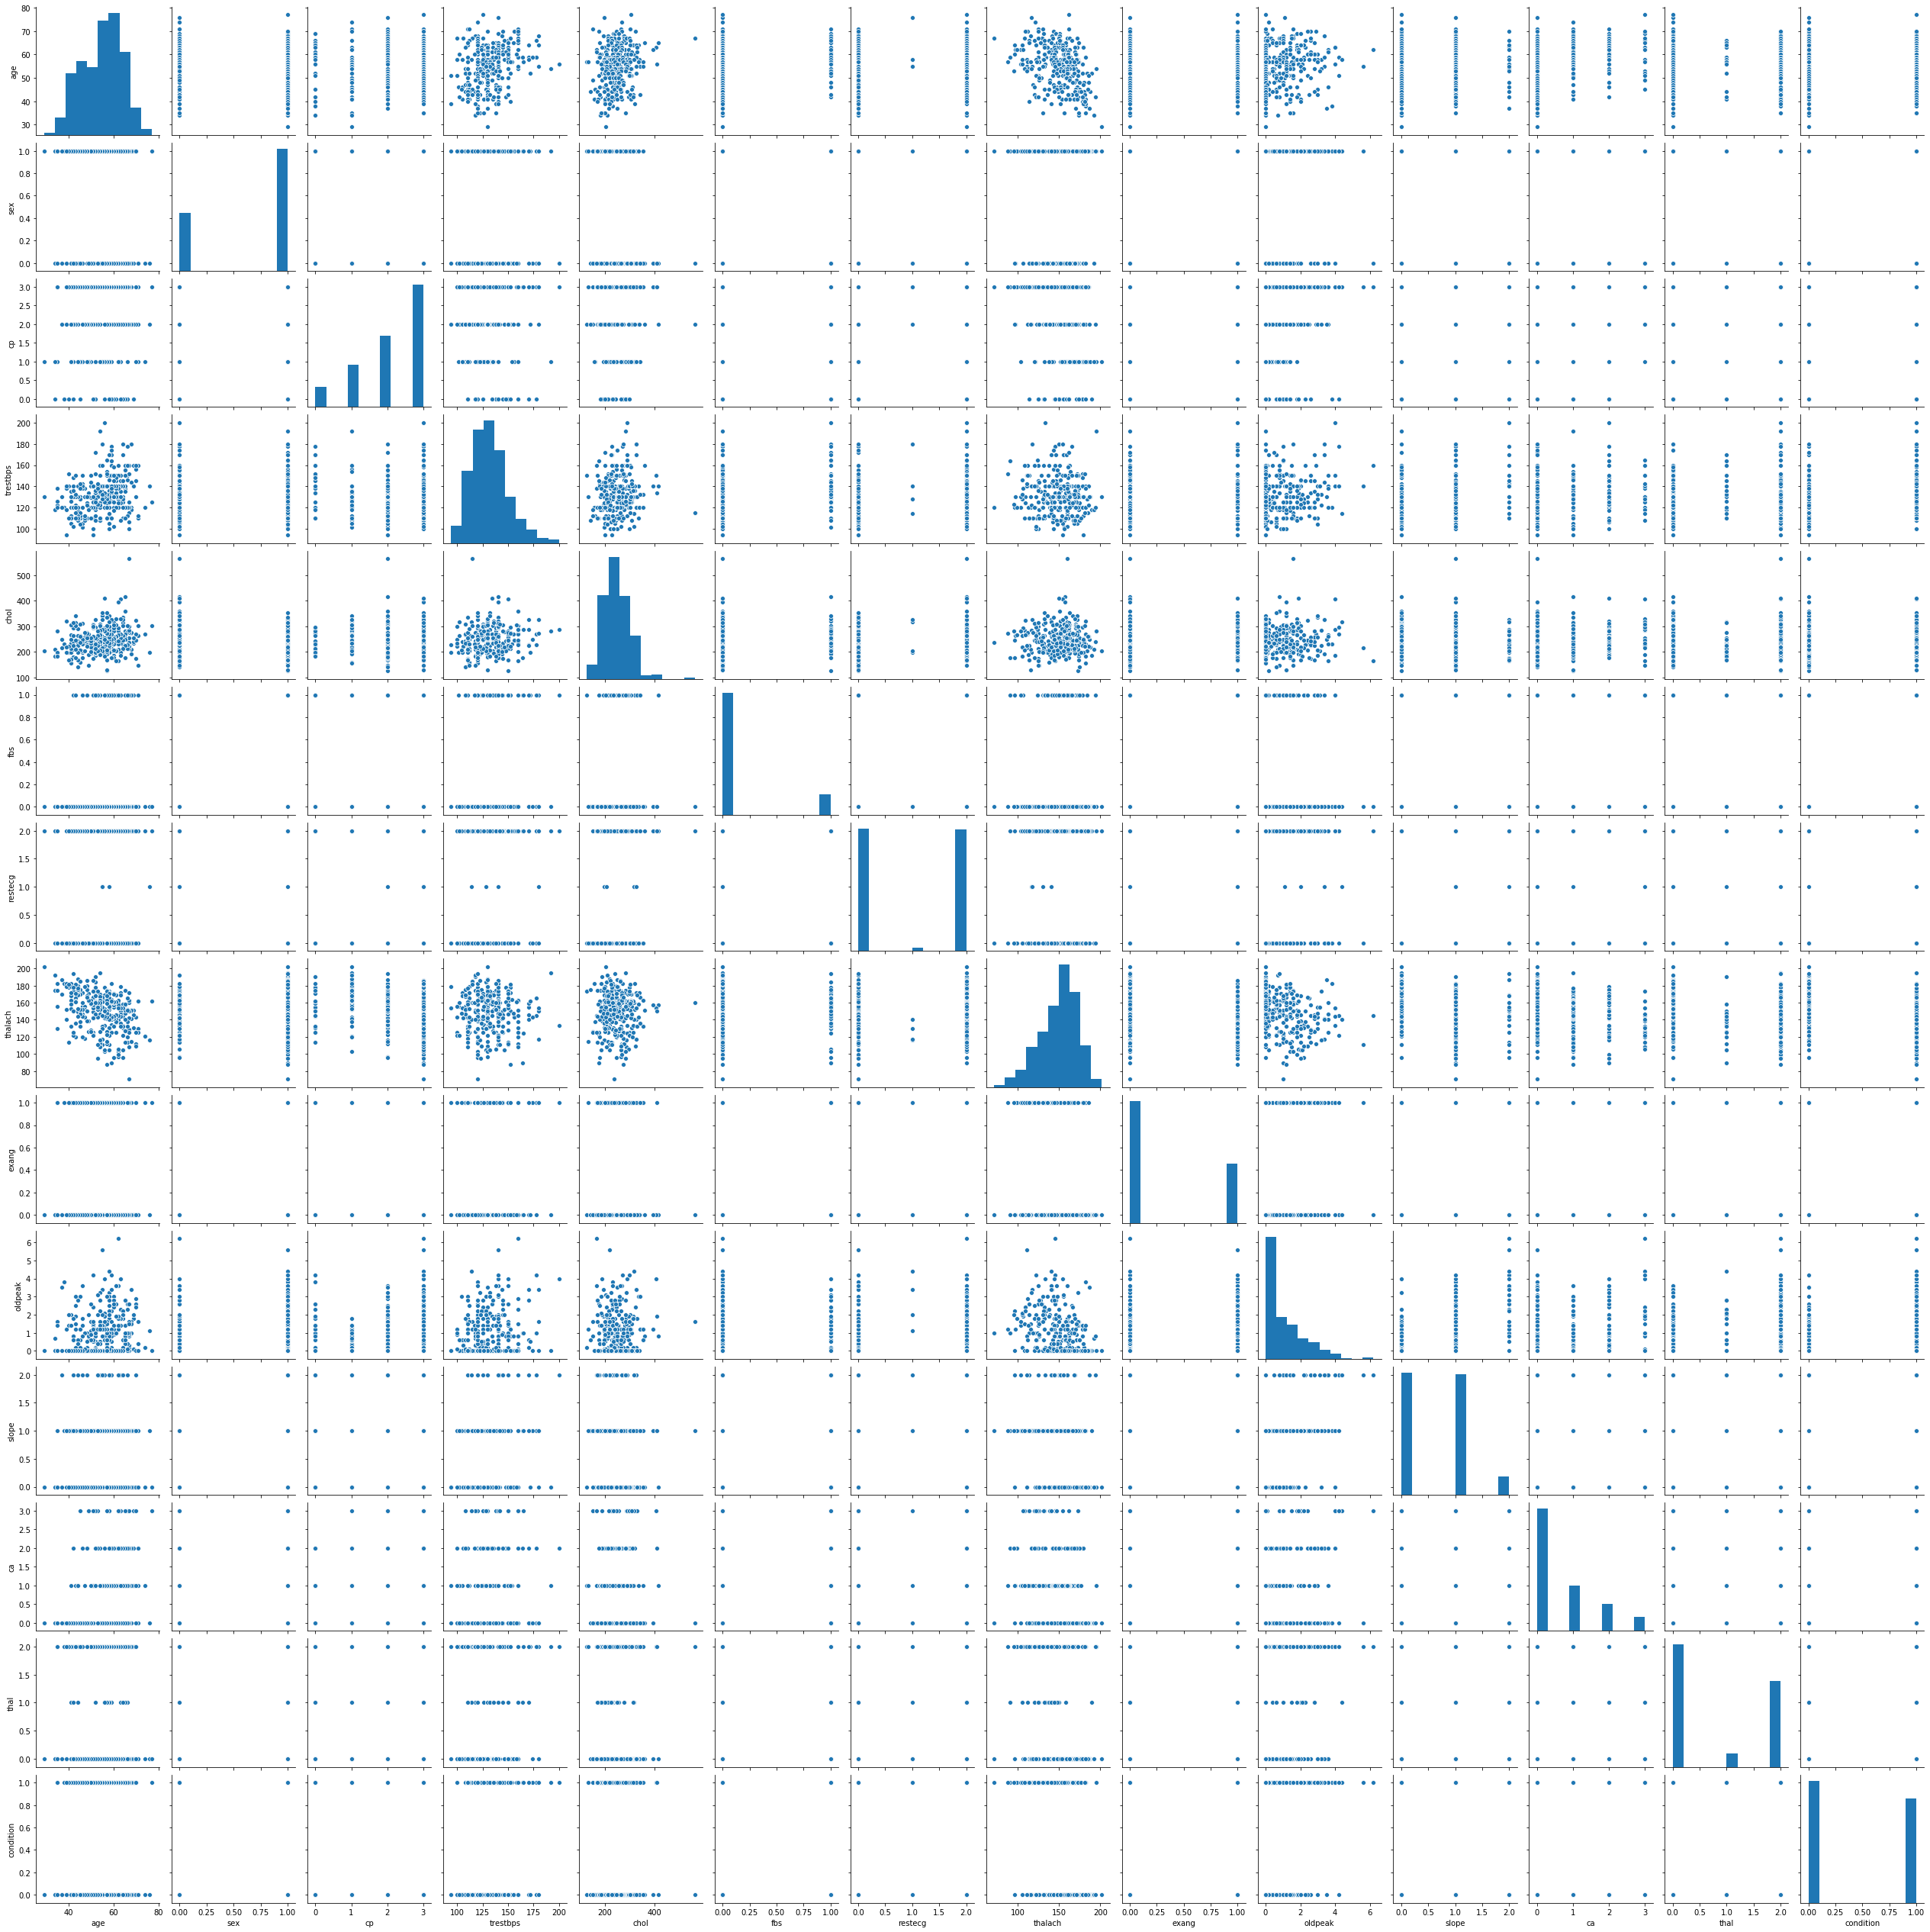

In [33]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1511F930>,
      dtype=object)

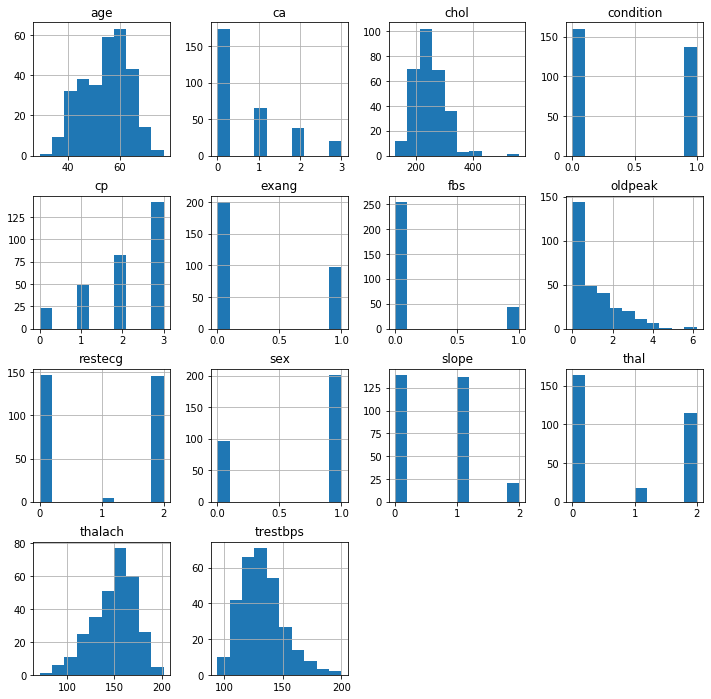

In [34]:
df.hist(figsize=(12,12), layout=(4,4))

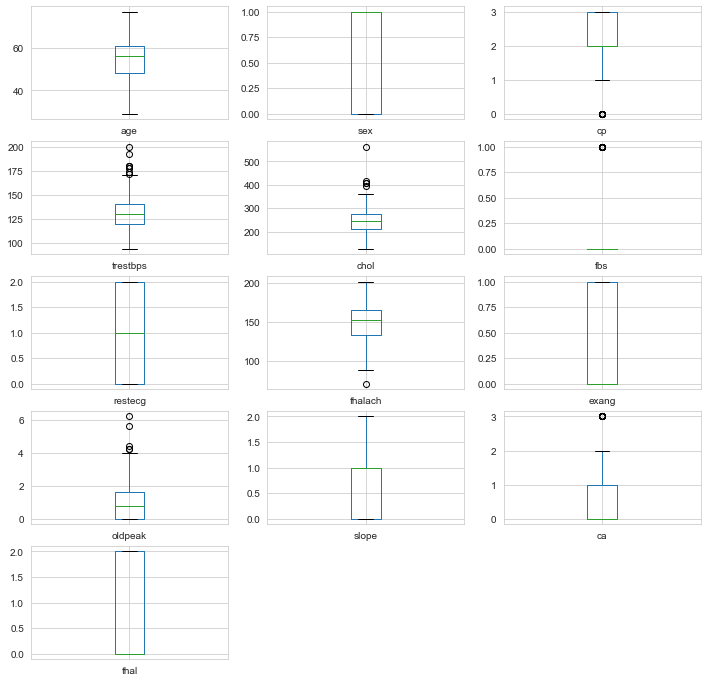

In [64]:
# box and whiskers plot
df_t = df.drop(['condition'],axis=1)
df_t.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()
#outliers????????????

### We display the countplots of discrete variables.
We have more males (1) in our observations.<br>
We have asymptomatic (3) as the most frequent chest pain type, non-anginal pain (2) comes the second.<br>
We have more observations with fasting blood sugar < 120 mg/dl (0).<br>
We have normal (0) as the most frequent resting electrocardiographic results, showing probable or definite left ventricular hypertrophy by Estes' criteria (2) comes the second.<br>
We have more observations with no exercise induced angina (0).<br>
We have upsloping (0) as the most frequent slope, flat (1) comes the second.<br>
We have 0 as the most frequent number of major vessels colored by flourosopy, 1 comes the second.<br>
We have normal (0) as the most frequent category in thal, reversable defect (2) comes the second.<br>
Finally, we have more patients without a heart condition.<br>

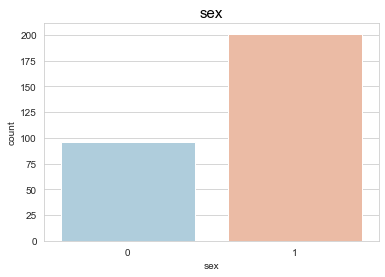

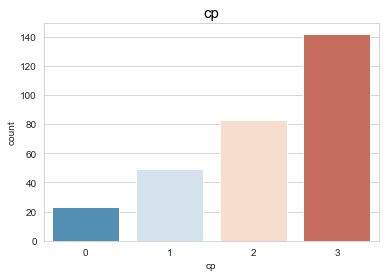

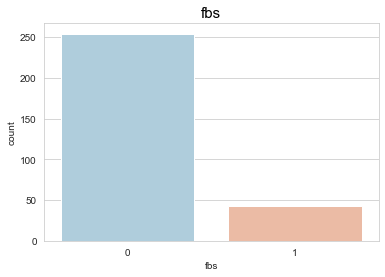

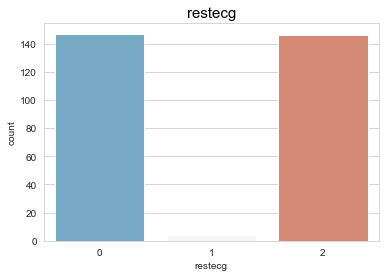

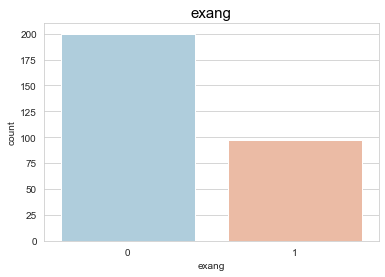

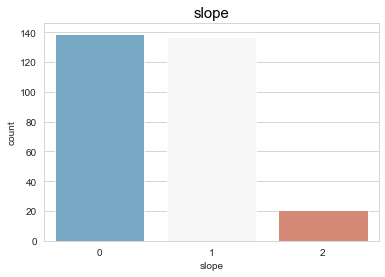

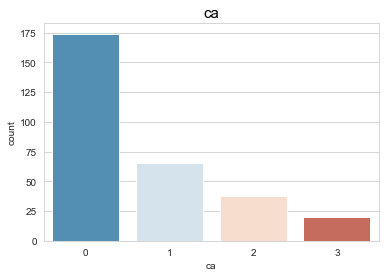

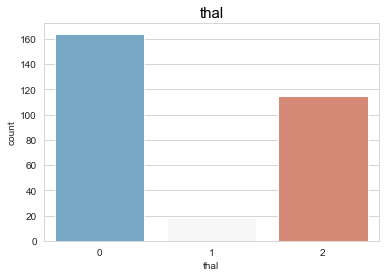

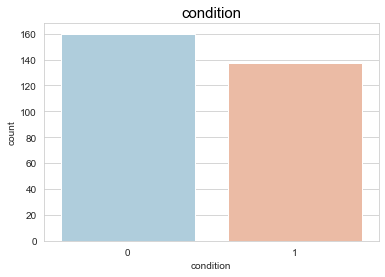

In [59]:
df1 = df.drop(['age','trestbps','chol','thalach','oldpeak'],axis=1)

for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.title(col, color='black',fontsize=15)
    sns.countplot(x=col, data=df1,palette='RdBu_r')

### Countplots with heart condition as the second factor.
Males have more heart condition than females.<br>
It is interesting to observe that patients who have asymptomatic chest pain type have higher heart condition compared to the other cp types. Then, chest pain type may not be a good indicator of heart condition.<br>
According to the resting electrocardiographic results, patient with the value of 1 and 2 tend to have higher heart condition.<br>
Patients who have exercise induced angina tend to have more heart condition.<br>
Regarding the slope of the peak exercise ST segment, patients with flat slope tend to have higher heart condition.<br>
It can be see that proportion of heart condition increases as the number of major vessels (0-3) colored by flourosopy increases.<br>
Regarding thal, patients with reversable defect tend to have higher heart condition.

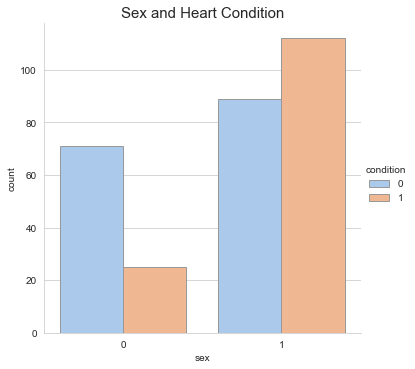

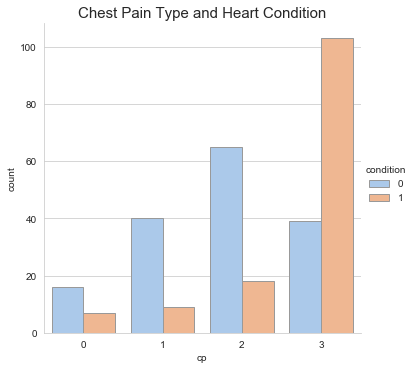

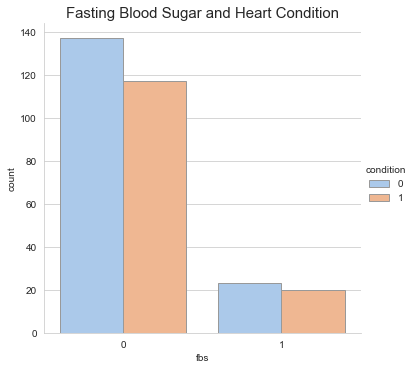

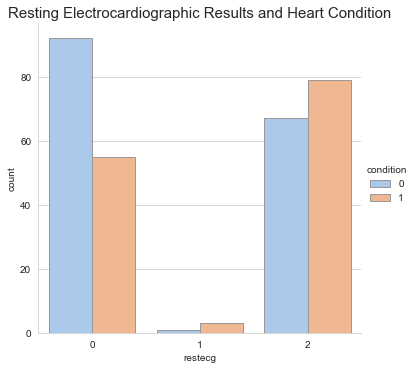

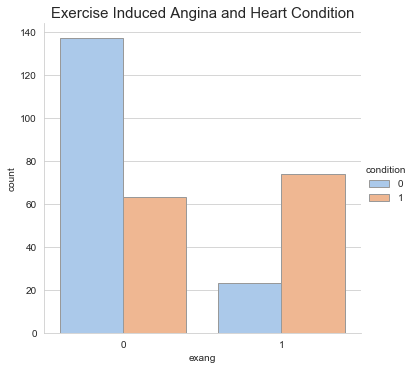

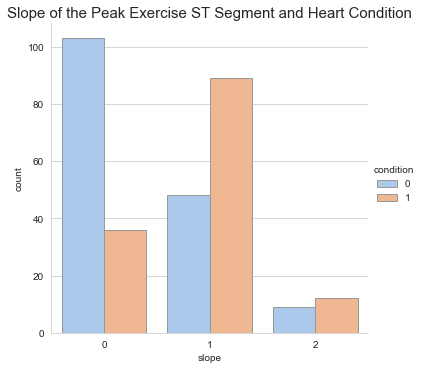

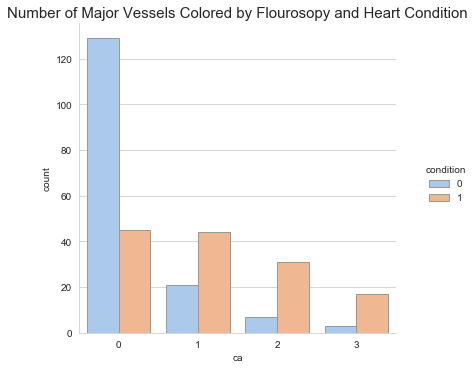

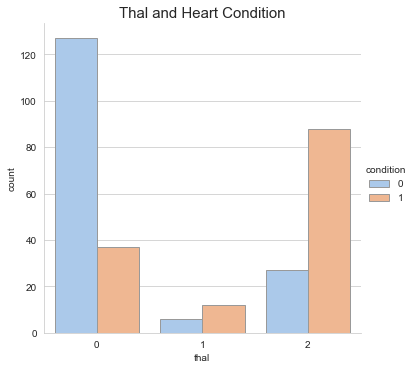

In [62]:
sns.catplot(x="sex", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Sex and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="cp", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Chest Pain Type and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="fbs", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Fasting Blood Sugar and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="restecg", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Resting Electrocardiographic Results and Heart Condition',fontsize=15)
plt.show()

sns.catplot(x="exang", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Exercise Induced Angina and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="slope", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Slope of the Peak Exercise ST Segment and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="ca", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Number of Major Vessels Colored by Flourosopy and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="thal", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Thal and Heart Condition',fontsize=15)
plt.show()

### Categorical vs Discrite variables

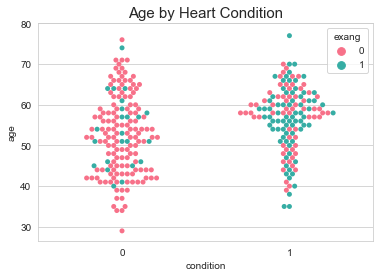

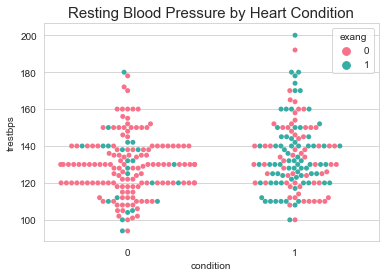

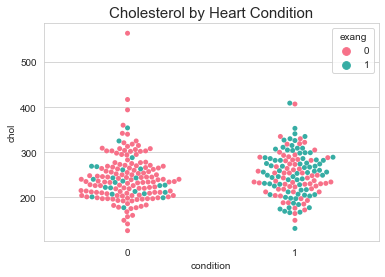

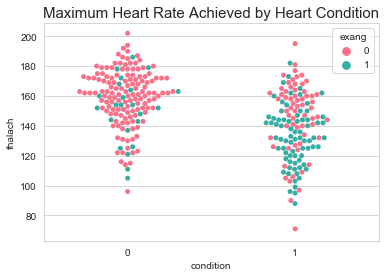

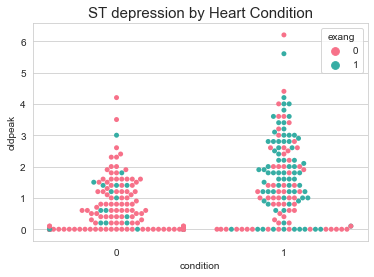

In [67]:
# exang
sns.swarmplot(x="condition", y="age", hue='exang' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='exang' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='exang' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='exang' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='exang' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',  fontsize=15)
plt.show()

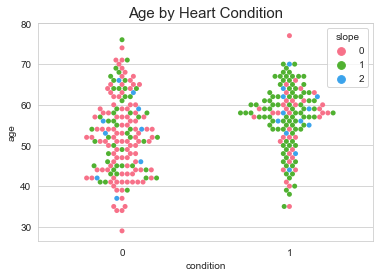

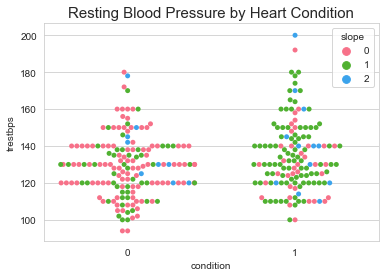

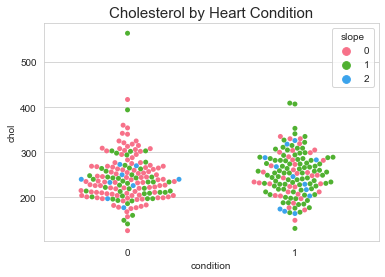

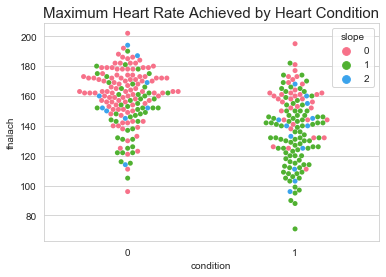

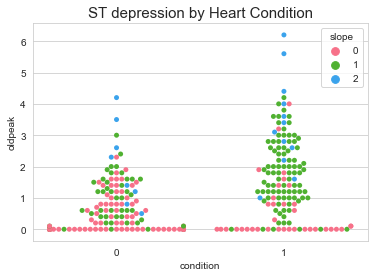

In [68]:
# slope
sns.swarmplot(x="condition", y="age", hue='slope' ,data=df,palette='husl' )
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='slope' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='slope' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='slope' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='slope' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

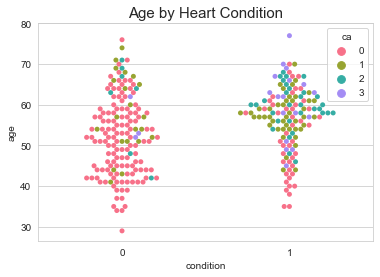

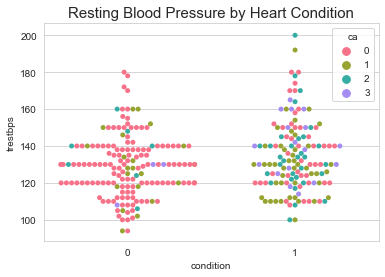

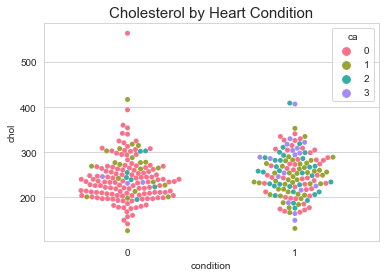

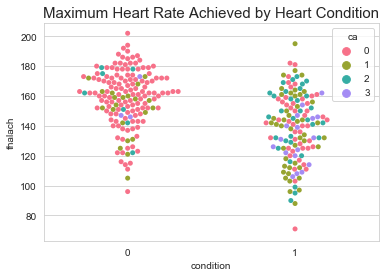

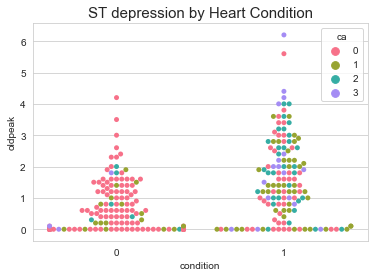

In [70]:
# ca
sns.swarmplot(x="condition", y="age", hue='ca' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='ca' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='ca' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='ca' ,data=df,palette='husl' )
plt.title('Maximum Heart Rate Achieved by Heart Condition',fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='ca' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',fontsize=15)
plt.show()

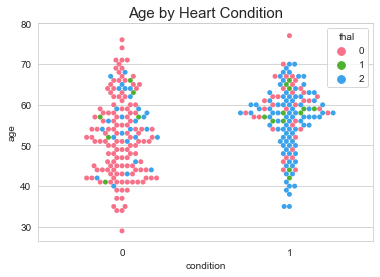

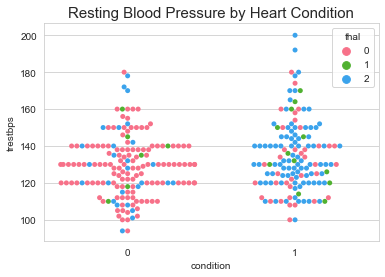

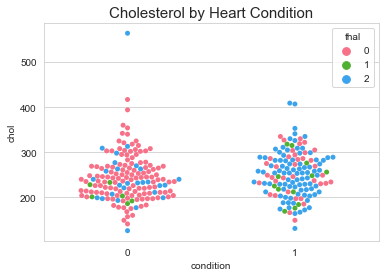

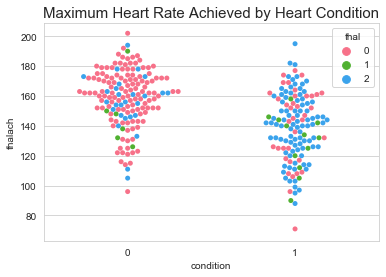

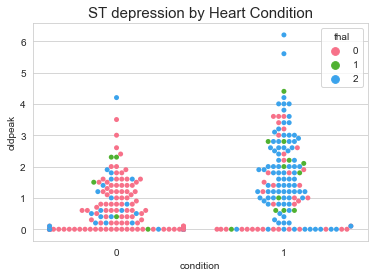

In [71]:
#thal
sns.swarmplot(x="condition", y="age", hue='thal' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='thal' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='thal' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='thal' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='thal' ,data=df,  palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

### Data Processing
 
По разгледувањето и објаснување на дата сетот дадено погоре можеме да забележиме дека има многу features кои имаат категорични вредности, за да ги претвориме таканаречените categorical features во dummy variables ќе го користиме методот 'get_dummies', а потоа ќе извршиме скалирање на вредностите, видејќи како што се гледа погоре имаме големи разлики во вредностите. На пример за age имаме вредности од 29 до 77 години, за chol од 126 до 564, а condition има вредности само 0 и 1, затоа имаме потреба од скалирање.
Gradient decent?

In [76]:
dataset = pd.get_dummies(df, columns = ['cp','restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,condition,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,1,160,234,1,131,0.1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,0,140,239,0,151,1.8,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,0,150,226,0,114,2.6,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,1,138,282,1,174,1.4,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,1,110,211,0,144,1.8,0,1,0,...,0,1,0,1,0,0,0,1,0,0


Во табелата погоре можеме да забележиме дека се додадени нови колини кои одговараат на категорични вредности кои ги имавме претходно.

## Data scaling
### Standartization and Normalization

#### Normalization(Min-max Normalization)
- ни овозможува да ги скалираме вредностите помеѓу 0 и 1
- $ Xnorm = (X-Xmin)/(Xmax-Xmin) $

#### Standartization(StandardScaler)
- ни овозможува слалирање на вредностите базирано на стандарна нормална распределба(најчесто mean(mi) = 0, а  std(sigma) = 1)
- $ z = (x-mi)/sigma $

### Стандардизација

In [77]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### Нормализација

In [293]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.drop(["condition"],axis = 1)
y = dataset.condition
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

X1 = df.drop(["condition"],axis = 1)
y1 = dataset.condition
scaler1 = MinMaxScaler().fit(X1)
X1_scaled = scaler1.transform(X1)

### Поделба да датасет

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=40)
X1_train, X1_test, y1_train, y1_test=train_test_split(X1_scaled,y1,test_size=0.3,random_state=40)

In [95]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 5382
X_test- 2340
y_train- 207
y_test- 90


### K Neighbors Classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [237]:
kNN = KNeighborsClassifier()
model_kNN = kNN.fit(X_train, y_train)
prediction_kNN = model_kNN.predict(X_test)
y_pred_quant_kNN = model_kNN.predict_proba(X_test)[:, 1]

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [161]:
print(confusion_matrix(y_test, prediction_kNN))
accuracy_score(y_test,prediction_kNN)

[[35 13]
 [ 7 35]]


0.7777777777777778

In [163]:
print(classification_report(y_test, prediction_kNN))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.73      0.83      0.78        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Точност-score kNN: 0.87
Прецизност kNN: 0.69
Чувствителност kNN: 0.64
F1 kNN: 0.67


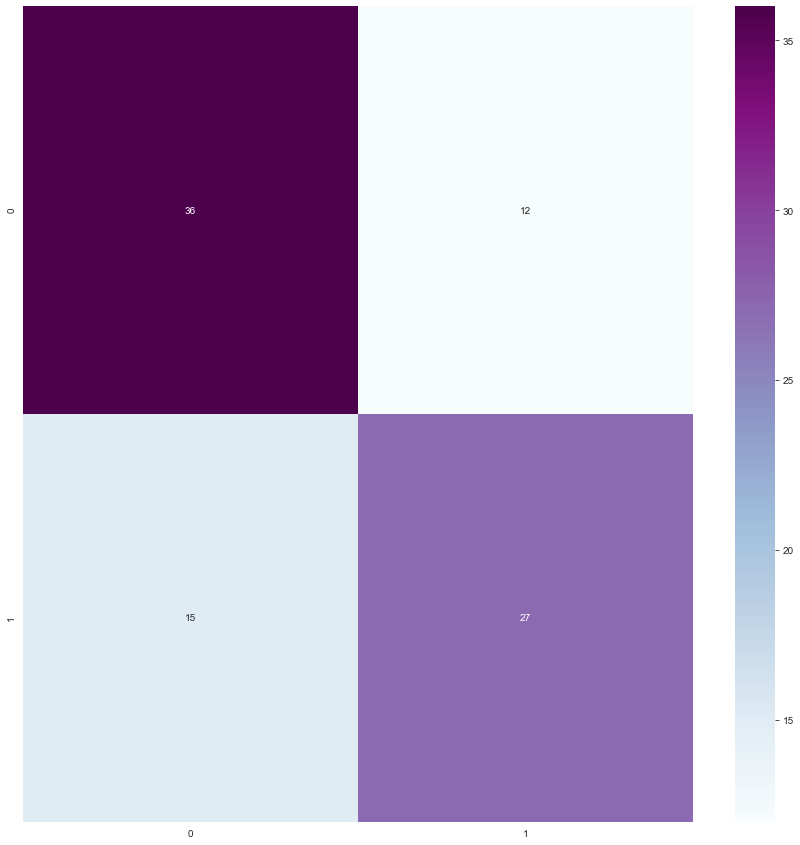

In [231]:
score_kNN = cross_val_score(kNN, X_train, y_train, cv=10)
score_kNN
print("Точност-score kNN: %0.2f" % (score_kNN.mean()))
y_kNN_pred = cross_val_predict(kNN, X_test, y_test, cv=10)
mkNN = confusion_matrix(y_test, y_kNN_pred)
sns.heatmap(mkNN, annot=True,cmap='BuPu')
preci_kNN = precision_score(y_test, y_kNN_pred)
print("Прецизност kNN: %0.2f" % preci_kNN)
sensi_kNN = recall_score(y_test, y_kNN_pred)
print("Чувствителност kNN: %0.2f" % sensi_kNN)
f1_kNN = f1_score(y_test, y_kNN_pred)
print("F1 kNN: %0.2f" % f1_kNN)
proba_kNN = cross_val_predict(kNN, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Validation Curve (indetification of over/under fitting)

In [174]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_neighbors'
param_range = np.arange(3, 20, 2)
cv= StratifiedKFold(4)

train_scores, valid_scores = validation_curve(kNN, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                                cv=cv)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.96396396 0.89686099 0.88789238 0.91928251]
 [0.93693694 0.87892377 0.85201794 0.90134529]
 [0.92342342 0.86995516 0.85201794 0.9058296 ]
 [0.93693694 0.84753363 0.80717489 0.89237668]
 [0.92342342 0.83408072 0.79372197 0.88789238]
 [0.90990991 0.84304933 0.81165919 0.88340807]
 [0.90990991 0.82959641 0.79820628 0.88789238]
 [0.8963964  0.84304933 0.78475336 0.87443946]
 [0.89189189 0.84753363 0.79820628 0.87443946]]
[[0.62666667 0.85135135 0.82432432 0.59459459]
 [0.64       0.85135135 0.87837838 0.7027027 ]
 [0.62666667 0.82432432 0.91891892 0.75675676]
 [0.61333333 0.85135135 0.94594595 0.72972973]
 [0.64       0.83783784 0.93243243 0.72972973]
 [0.6        0.85135135 0.93243243 0.75675676]
 [0.61333333 0.83783784 0.91891892 0.77027027]
 [0.62666667 0.86486486 0.91891892 0.77027027]
 [0.62666667 0.86486486 0.93243243 0.77027027]]


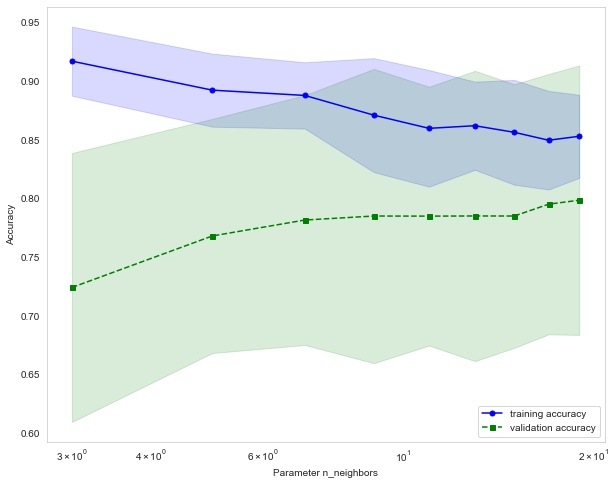

In [179]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

#### Learning Curve

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


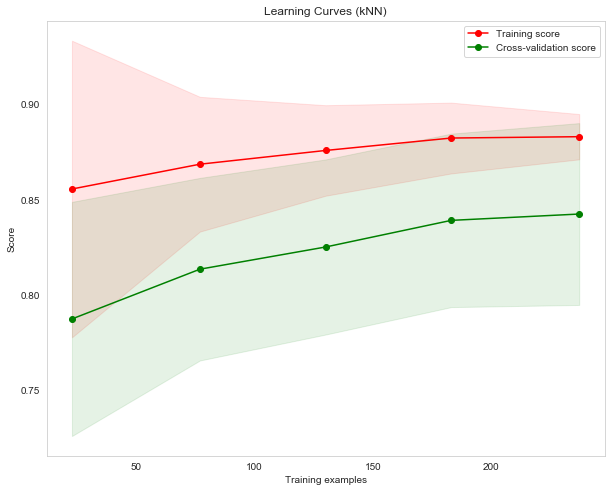

In [195]:
title = "Learning Curves (kNN)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = kNN
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

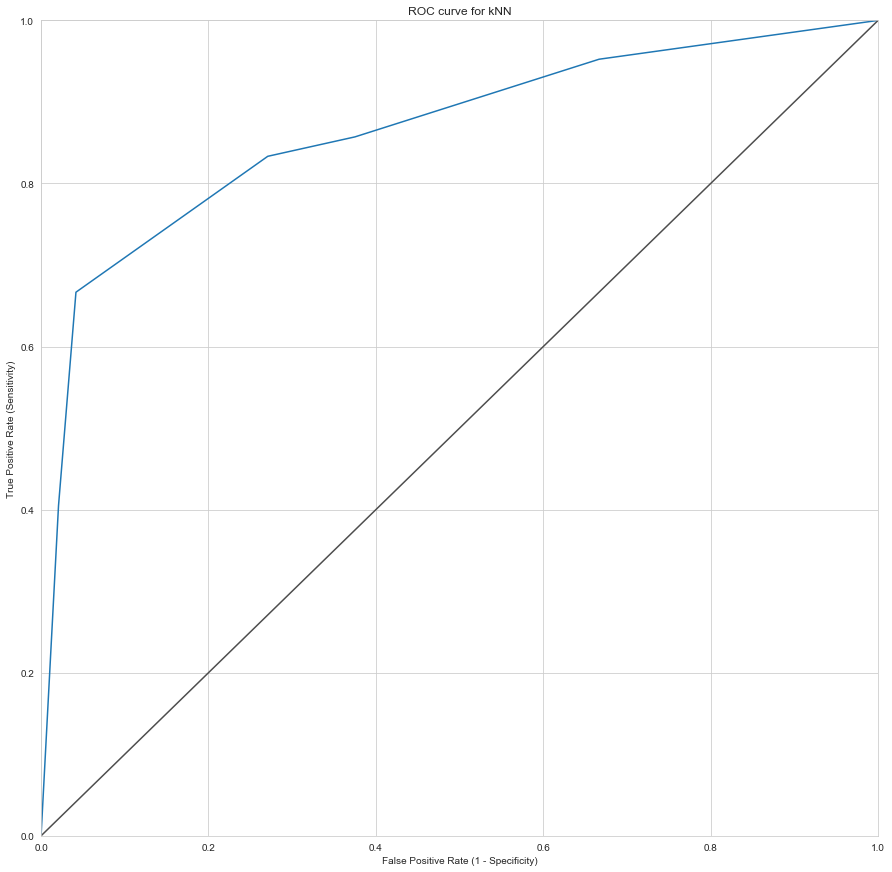

AUC Score : 0.8645833333333333


In [207]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

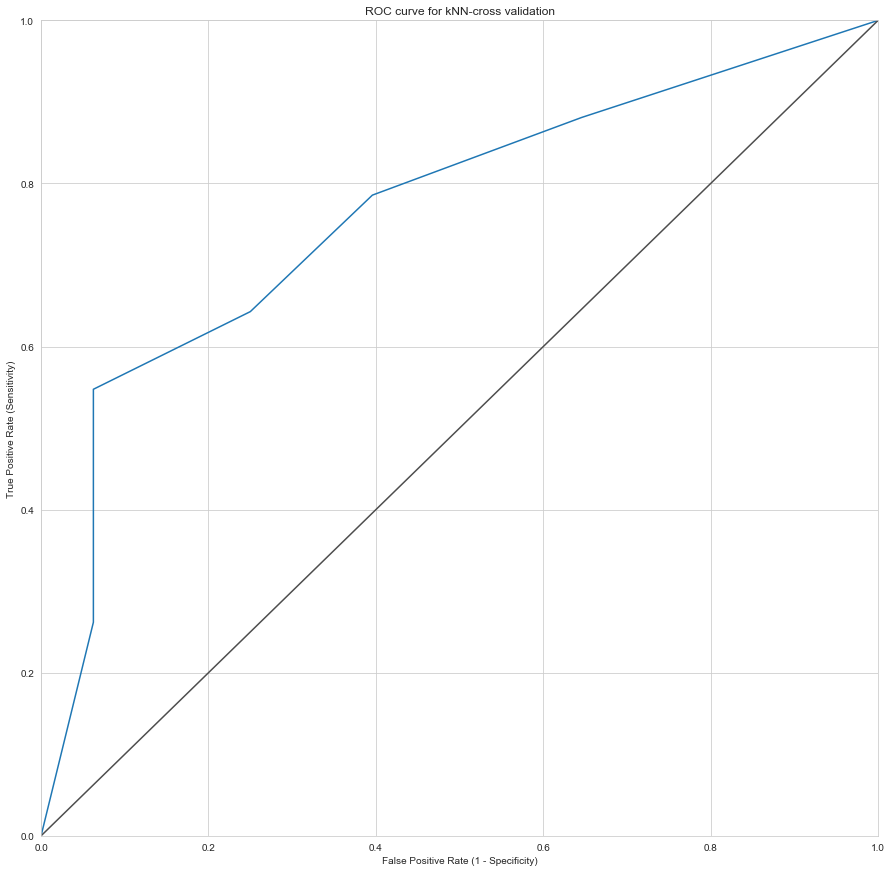

AUC Score : 0.7653769841269842


In [232]:
fpr, tpr, thresholds = roc_curve(y_test, proba_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

### Naive Bayes

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
NB = GaussianNB()
model_NB = NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)
y_pred_quant_NB = model_NB.predict_proba(X_test)[:, 1]

In [192]:
accuracy_score(y_test,prediction_NB)

0.8

In [193]:
print(classification_report(y_test, prediction_NB))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.82      0.74      0.78        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



#### Validation Curve

In [244]:
# from sklearn.model_selection import validation_curve
# from sklearn.model_selection import StratifiedKFold


# param_name = 'priors'
# param_range = np.arange(1, 20)

# train_scores, valid_scores = validation_curve(NB, 
#                                                X, 
#                                                y, 
#                                                param_name,
#                                                param_range
#                                                )
# print(train_scores)
# print(valid_scores)

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(valid_scores, axis=1)
# test_std = np.std(valid_scores, axis=1)

#### Cross-validation

Точност-score NB: 0.84
Прецизност NB: 0.69
Чувствителност NB: 0.64
F1 NB: 0.67


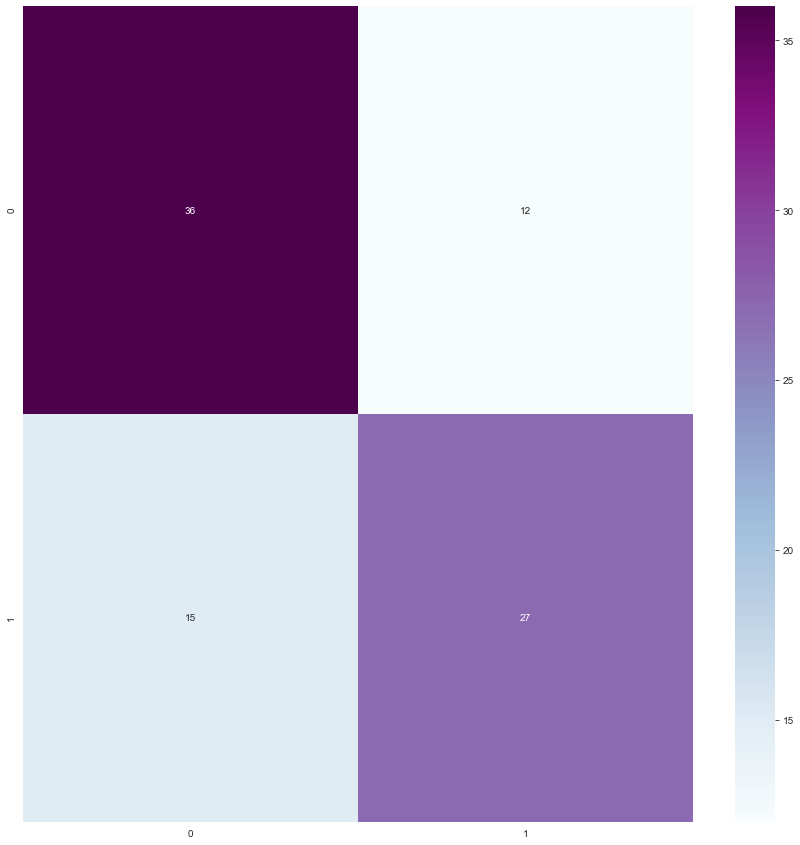

In [248]:
score_NB = cross_val_score(NB, X_train, y_train, cv=10)
score_NB
print("Точност-score NB: %0.2f" % (score_NB.mean()))
y_NB_pred = cross_val_predict(NB, X_test, y_test, cv=10)
mNB = confusion_matrix(y_test, y_NB_pred)
sns.heatmap(mNB, annot=True,cmap='BuPu')
preci_NB = precision_score(y_test, y_NB_pred)
print("Прецизност NB: %0.2f" % preci_NB)
sensi_NB = recall_score(y_test, y_NB_pred)
print("Чувствителност NB: %0.2f" % sensi_NB)
f1_NB = f1_score(y_test, y_NB_pred)
print("F1 NB: %0.2f" % f1_kNN)
proba_NB = cross_val_predict(NB, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning curve

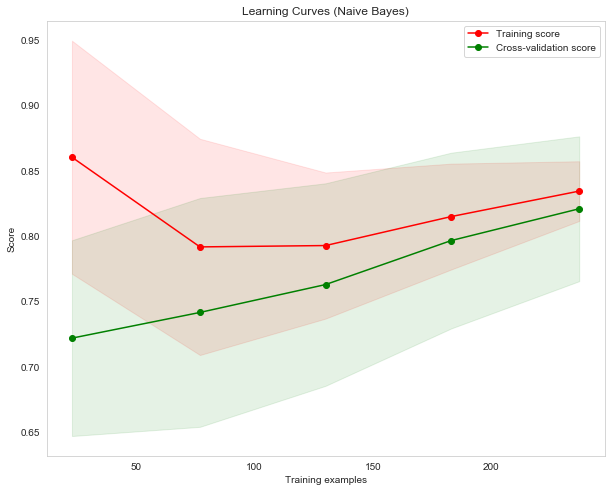

In [246]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = NB
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

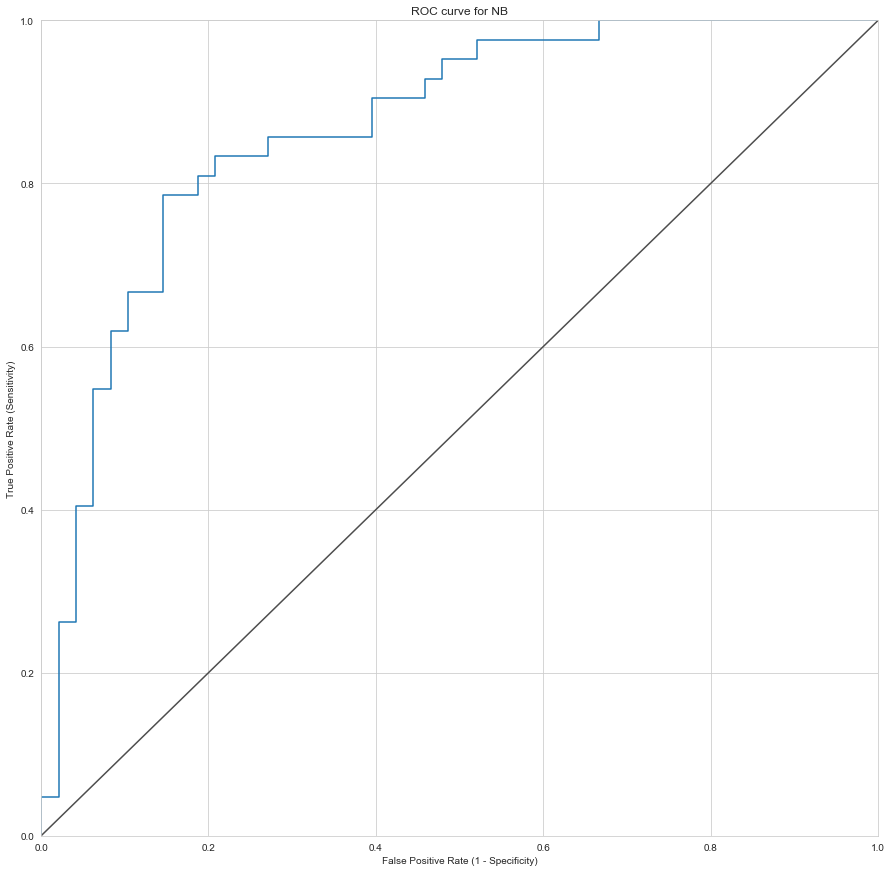

AUC Score : 0.8670634920634921


In [247]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

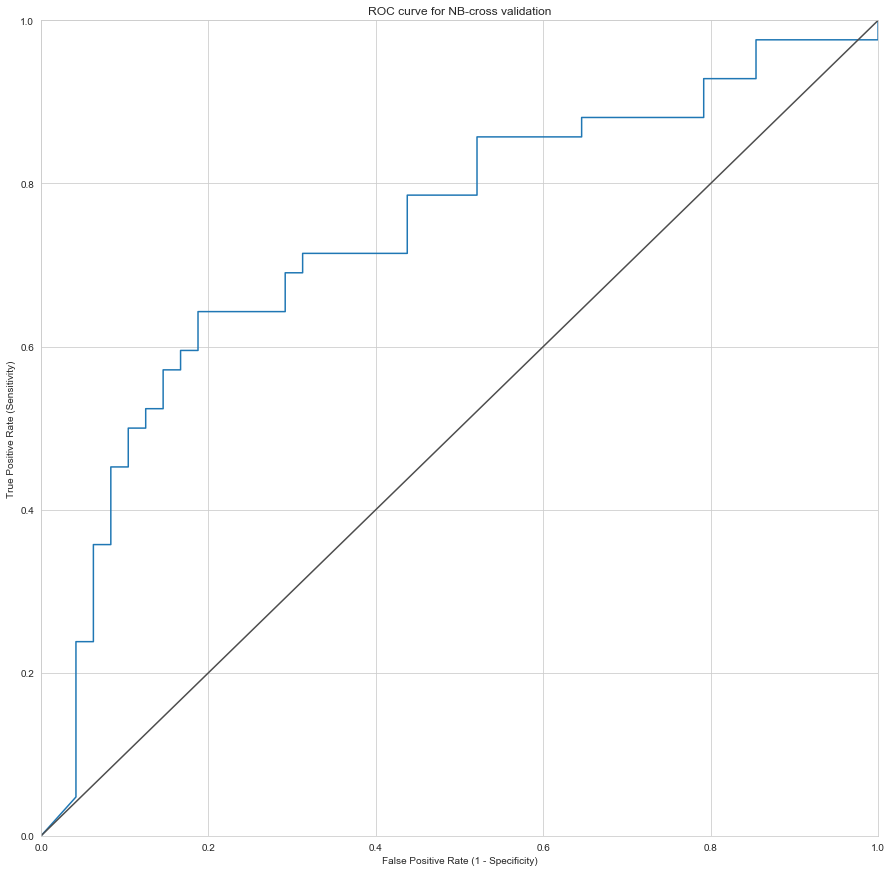

AUC Score : 0.7405753968253967


In [249]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

### Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [252]:
LR = LogisticRegression()
model_LR = LR.fit(X_train,y_train)
prediction_LR = model_LR.predict(X_test)
y_pred_quant_LR = model_LR.predict_proba(X_test)[:, 1]

In [251]:
print(accuracy_score(y_test,prediction_LR))
confusion_matrix(y_test, prediction_LR)

0.7777777777777778


array([[39,  9],
       [11, 31]], dtype=int64)

In [110]:
print(classification_report(y_test, prediction_LR))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.78      0.74      0.76        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Точностscore LR: 0.87
Прецизност LR: 0.74
Чувствителност LR: 0.69
F1 LR: 0.72


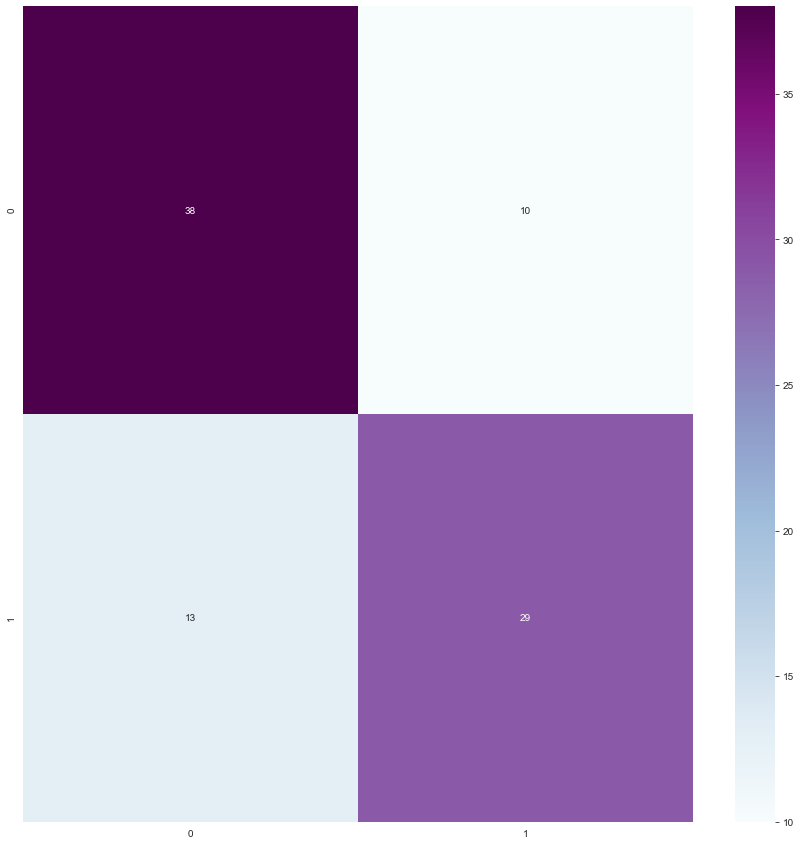

In [224]:
score_LR = cross_val_score(LR, X_train, y_train, cv=10)
score_LR
print("Точностscore LR: %0.2f" % (score_LR.mean()))
y_LR_pred = cross_val_predict(LR, X_test, y_test, cv=10)
mLR = confusion_matrix(y_test, y_LR_pred)
sns.heatmap(mLR, annot=True,cmap='BuPu')
preci_LR = precision_score(y_test, y_LR_pred)
print("Прецизност LR: %0.2f" % preci_LR)
sensi_LR = recall_score(y_test, y_LR_pred)
print("Чувствителност LR: %0.2f" % sensi_LR)
f1_LR = f1_score(y_test, y_LR_pred)
print("F1 LR: %0.2f" % f1_LR)
proba_LR = cross_val_predict(LR, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Validation Curve

[[0.9035533  0.82828283 0.88944724]
 [0.89847716 0.83333333 0.88944724]
 [0.9035533  0.82323232 0.89447236]
 [0.9035533  0.82828283 0.89447236]
 [0.9035533  0.83333333 0.88944724]
 [0.9035533  0.83333333 0.88944724]
 [0.9035533  0.83838384 0.89447236]
 [0.9035533  0.83838384 0.89447236]
 [0.9035533  0.83838384 0.89949749]
 [0.9035533  0.83838384 0.89447236]]
[[0.71       0.82828283 0.74489796]
 [0.69       0.83838384 0.73469388]
 [0.69       0.82828283 0.69387755]
 [0.7        0.81818182 0.66326531]
 [0.69       0.7979798  0.66326531]
 [0.69       0.7979798  0.66326531]
 [0.69       0.78787879 0.66326531]
 [0.69       0.78787879 0.66326531]
 [0.67       0.78787879 0.65306122]
 [0.67       0.78787879 0.64285714]]


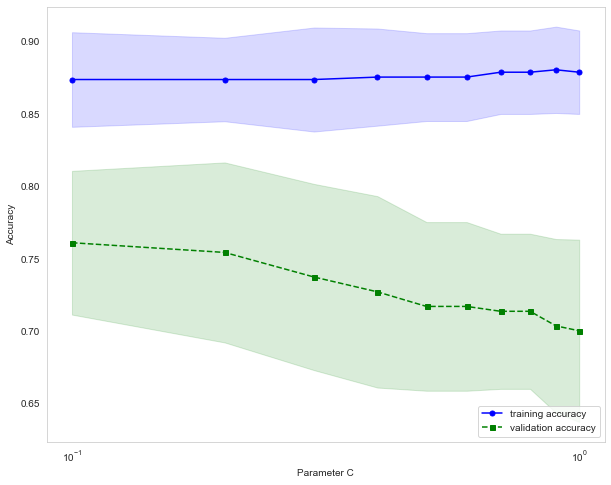

In [230]:
from sklearn.model_selection import validation_curve

param_name = "C"
param_range = np.linspace(.1, 1.0, 10)

train_scores, valid_scores = validation_curve(LR, 
                                              X, 
                                              y, 
                                              param_name,
                                              param_range)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Learning Curve

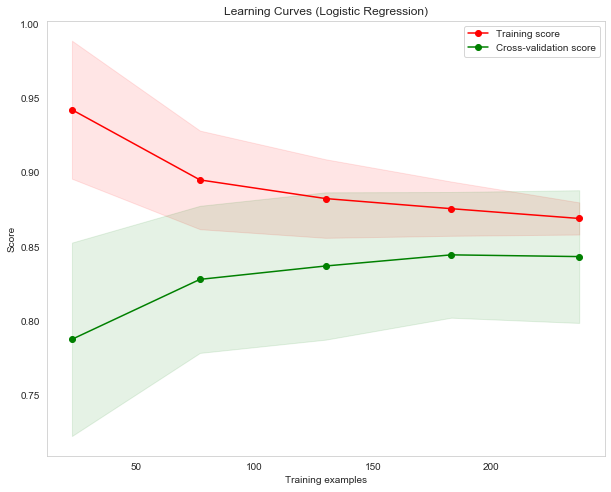

In [273]:
title = "Learning Curves (Logistic Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LR
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Посакуаната (идална) вредност на перформансот е 1, од сликата се забележува дека двете криви конвергираат кон 0.87 (High Bias Learning Curve). Тоа би значело недостаток на карактеристики (features).

#### ROC Curve

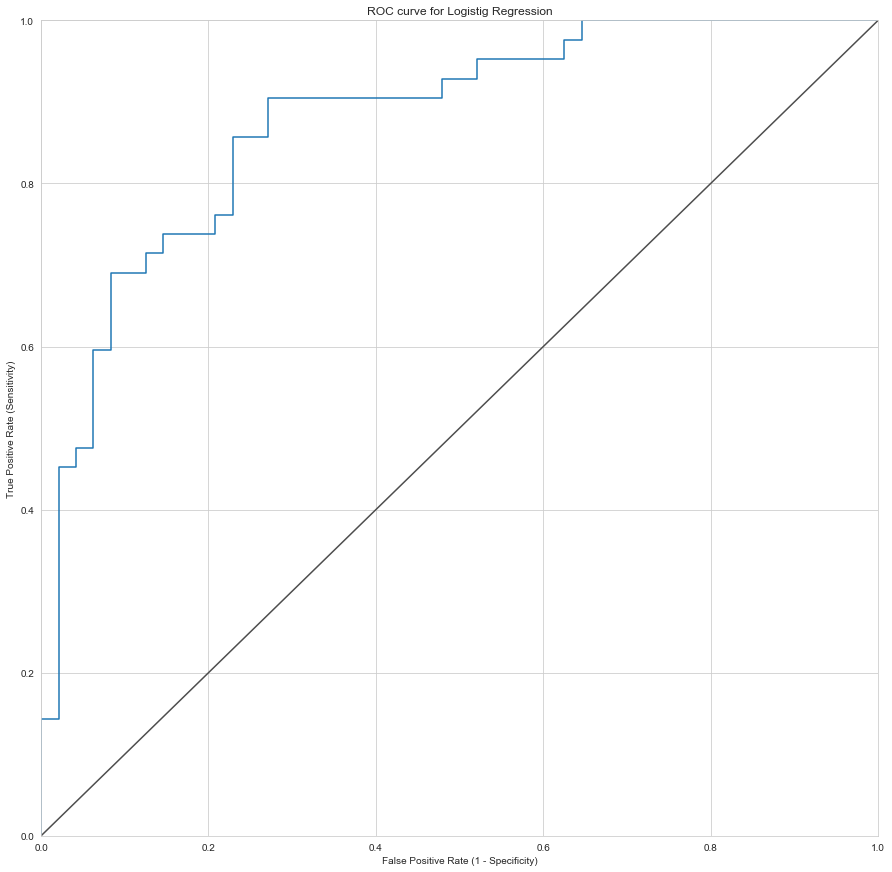

AUC Score : 0.876984126984127


In [253]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_LR)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

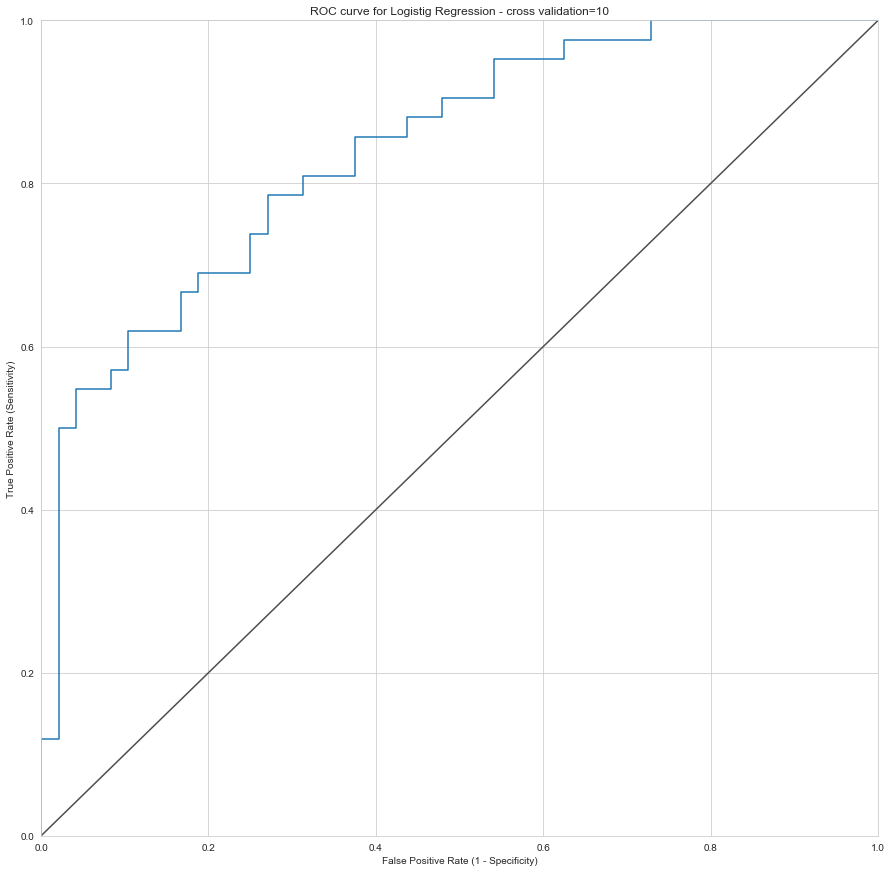

AUC Score : 0.8407738095238095


In [226]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_LR)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

###  Decision Tree Classifier

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
DTC = DecisionTreeClassifier()
model_DTC = DTC.fit(X_train,y_train)
prediction_DTC = model_DTC.predict(X_test)
y_pred_quant_DTC = model_DTC.predict_proba(X_test)[:, 1]

In [262]:
print(accuracy_score(y_test,prediction_DTC))
confusion_matrix(y_test, prediction_RFC)

0.7


array([[40,  8],
       [ 9, 33]], dtype=int64)

#### Validation Curve

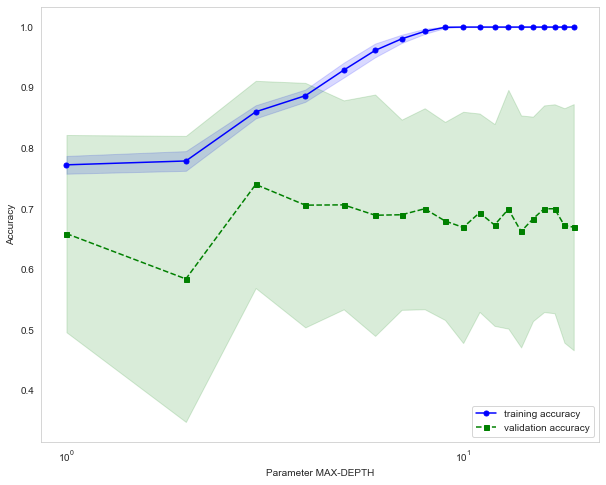

In [280]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = "max_depth"
param_range = np.arange(1, 20)
cv=10

train_scores, valid_scores = validation_curve(DTC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv
                                               )
(train_scores)
(valid_scores)

train_mean = np.mean(train_scores, axis=1);
train_std = np.std(train_scores, axis=1);

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter MAX-DEPTH')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross-validation

Точност-score DTC: 0.76
Прецизност DTC: 0.69
Чувствителност DTC: 0.50
F1 DTC: 0.53


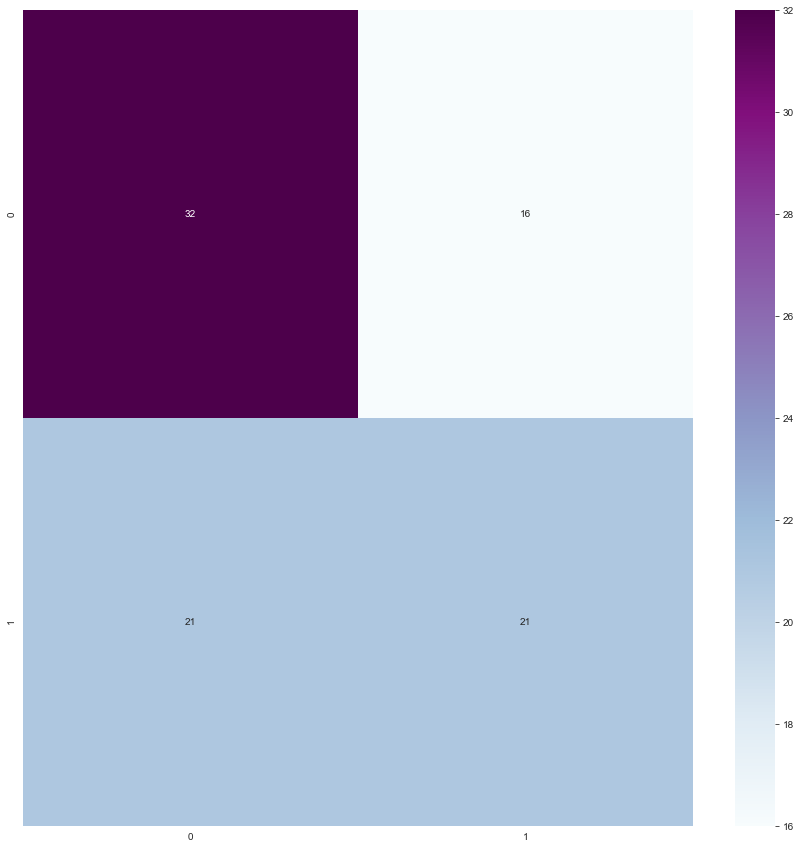

In [279]:
score_DTC = cross_val_score(DTC, X_train, y_train, cv=10)
score_DTC
print("Точност-score DTC: %0.2f" % (score_DTC.mean()))
y_DTC_pred = cross_val_predict(DTC, X_test, y_test, cv=10)
mDTC = confusion_matrix(y_test, y_DTC_pred)
sns.heatmap(mDTC, annot=True,cmap='BuPu')
preci_DTC = precision_score(y_test, y_DTC_pred)
print("Прецизност DTC: %0.2f" % preci_NB)
sensi_DTC = recall_score(y_test, y_DTC_pred)
print("Чувствителност DTC: %0.2f" % sensi_DTC)
f1_DTC = f1_score(y_test, y_DTC_pred)
print("F1 DTC: %0.2f" % f1_DTC)
proba_DTC = cross_val_predict(DTC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

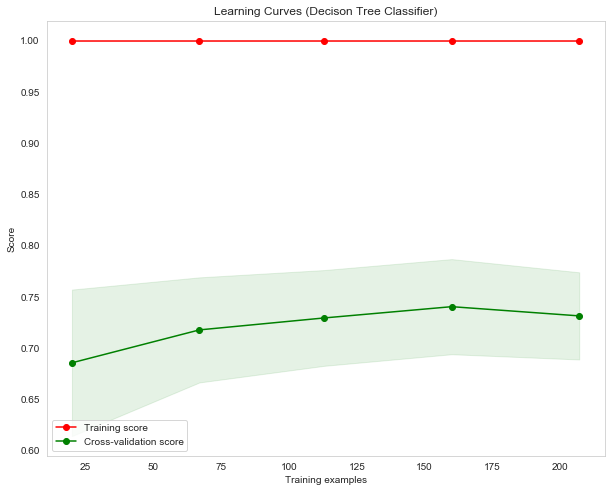

In [276]:
title = "Learning Curves (Decison Tree Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = DTC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

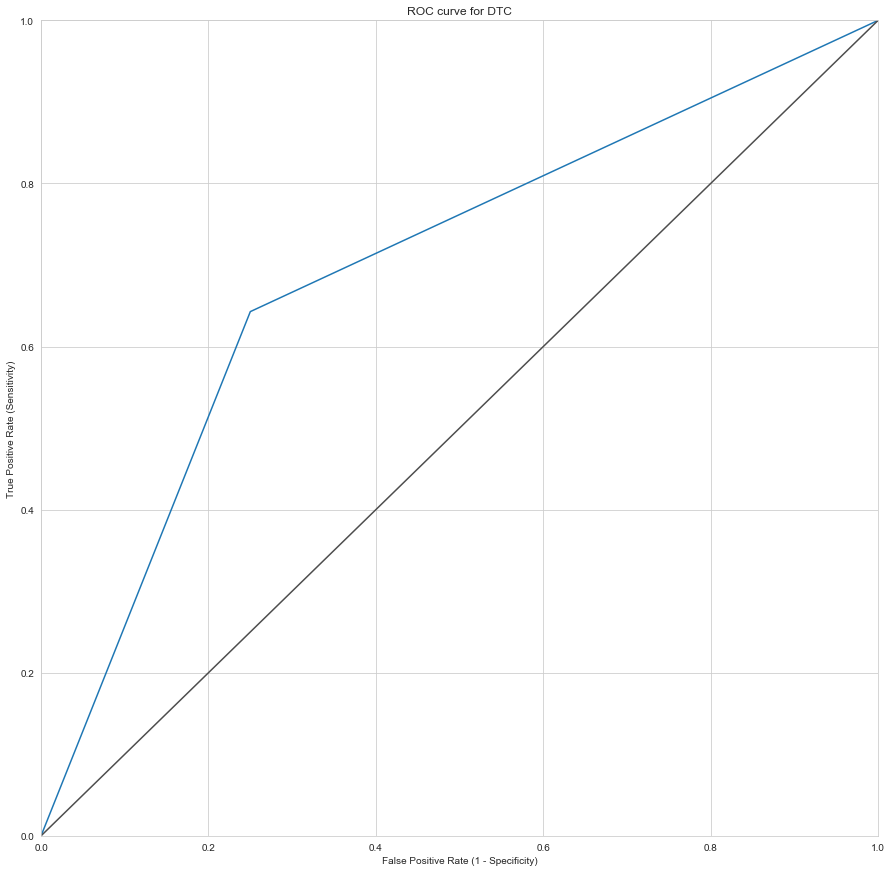

AUC Score : 0.6964285714285715


In [278]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

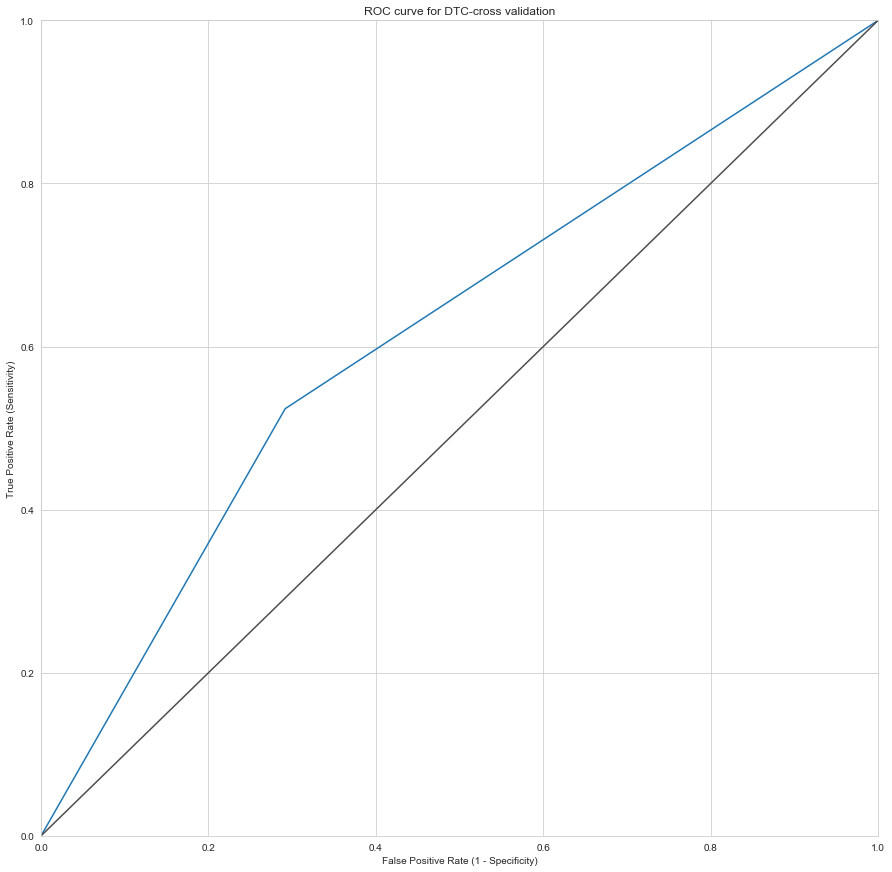

AUC Score : 0.6160714285714284


In [385]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

### Random Forest Classifier

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
RFC = RandomForestClassifier()
model_RFC = RFC.fit(X_train,y_train)
prediction_RFC = model_RFC.predict(X_test)
y_pred_quant_RFC = model_RFC.predict_proba(X_test)[:, 1]

In [295]:
model_RFC_1 = RFC.fit(X1_train,y1_train)
prediction_RFC_1 = model_RFC_1.predict(X1_test)
y_pred_quant_RFC_1 = model_RFC_1.predict_proba(X1_test)[:, 1]

In [257]:
print(accuracy_score(y_test,prediction_RFC))
confusion_matrix(y_test, prediction_RFC)

0.8111111111111111


array([[40,  8],
       [ 9, 33]], dtype=int64)

In [296]:
print(accuracy_score(y1_test,prediction_RFC_1))
confusion_matrix(y1_test, prediction_RFC_1)

0.7555555555555555


array([[40,  8],
       [14, 28]], dtype=int64)

#### Validation Curve

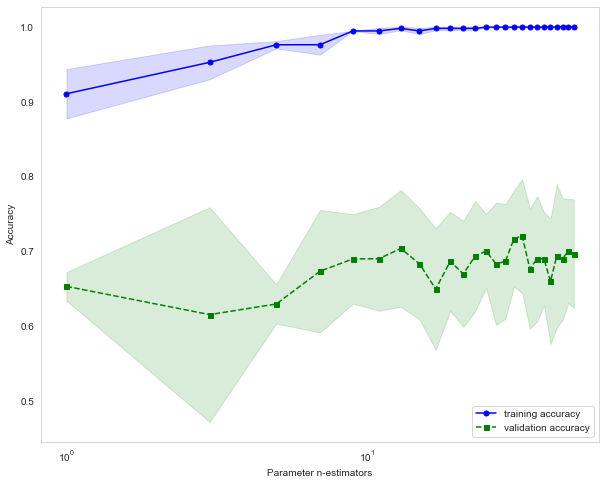

In [290]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_estimators'
param_range = np.arange(1, 50, 2)
cv=3

train_scores, valid_scores = validation_curve(RFC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=-1
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n-estimators')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross-Validation

Точност-score RFC: 0.85
Прецизност RFC: 0.68
Чувствителност RFC: 0.55
F1 RFC: 0.61


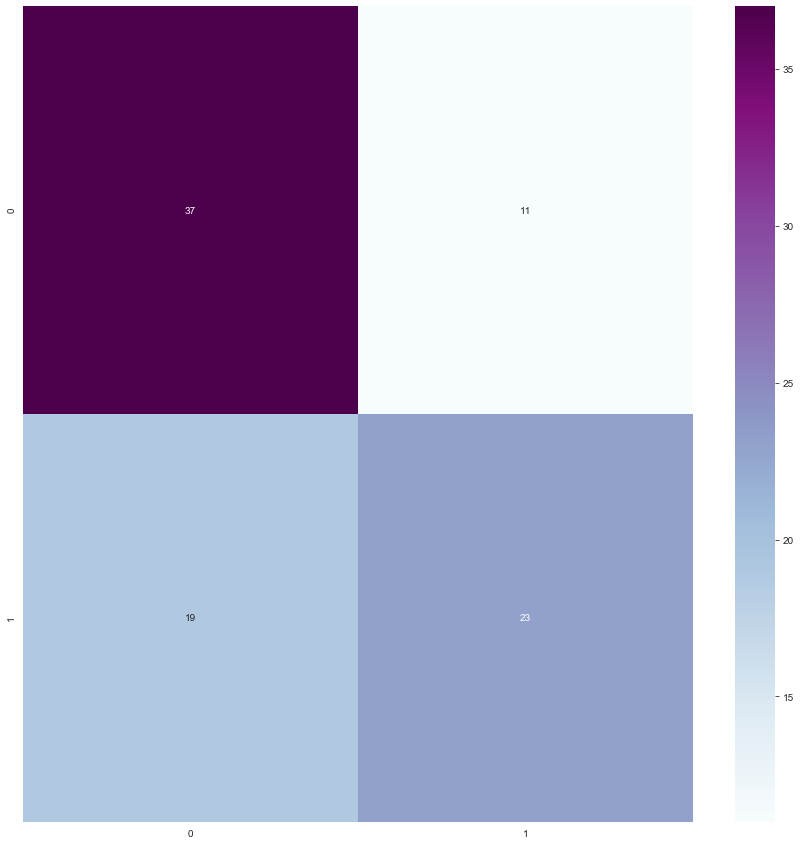

In [287]:
score_RFC = cross_val_score(RFC, X_train, y_train, cv=10)
score_RFC
print("Точност-score RFC: %0.2f" % (score_RFC.mean()))
y_RFC_pred = cross_val_predict(RFC, X_test, y_test, cv=10)
mRFC = confusion_matrix(y_test, y_RFC_pred)
sns.heatmap(mRFC, annot=True,cmap='BuPu')
preci_RFC = precision_score(y_test, y_RFC_pred)
print("Прецизност RFC: %0.2f" % preci_RFC)
sensi_RFC = recall_score(y_test, y_RFC_pred)
print("Чувствителност RFC: %0.2f" % sensi_RFC)
f1_RFC = f1_score(y_test, y_RFC_pred)
print("F1 RFC: %0.2f" % f1_RFC)
proba_RFC = cross_val_predict(RFC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

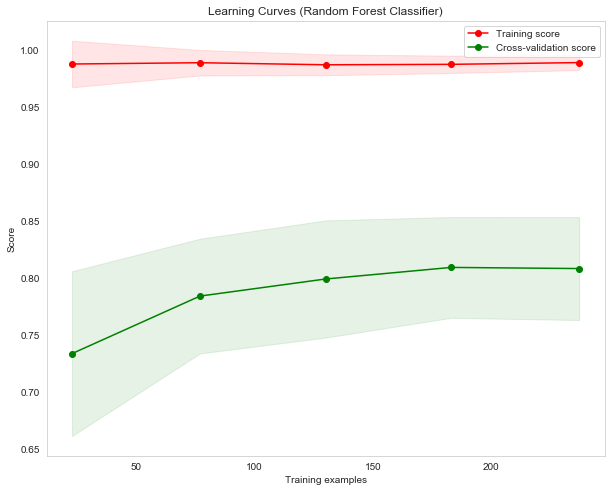

In [289]:
title = "Learning Curves (Random Forest Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RFC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

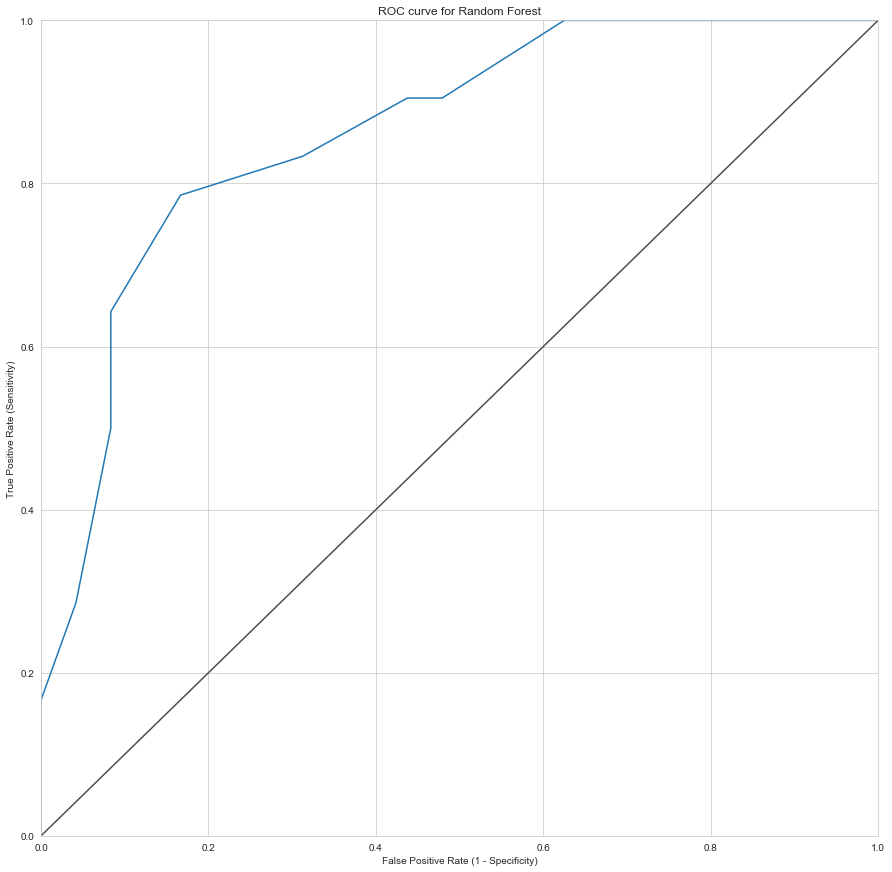

AUC Score : 0.8635912698412699


In [291]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Random Forest', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

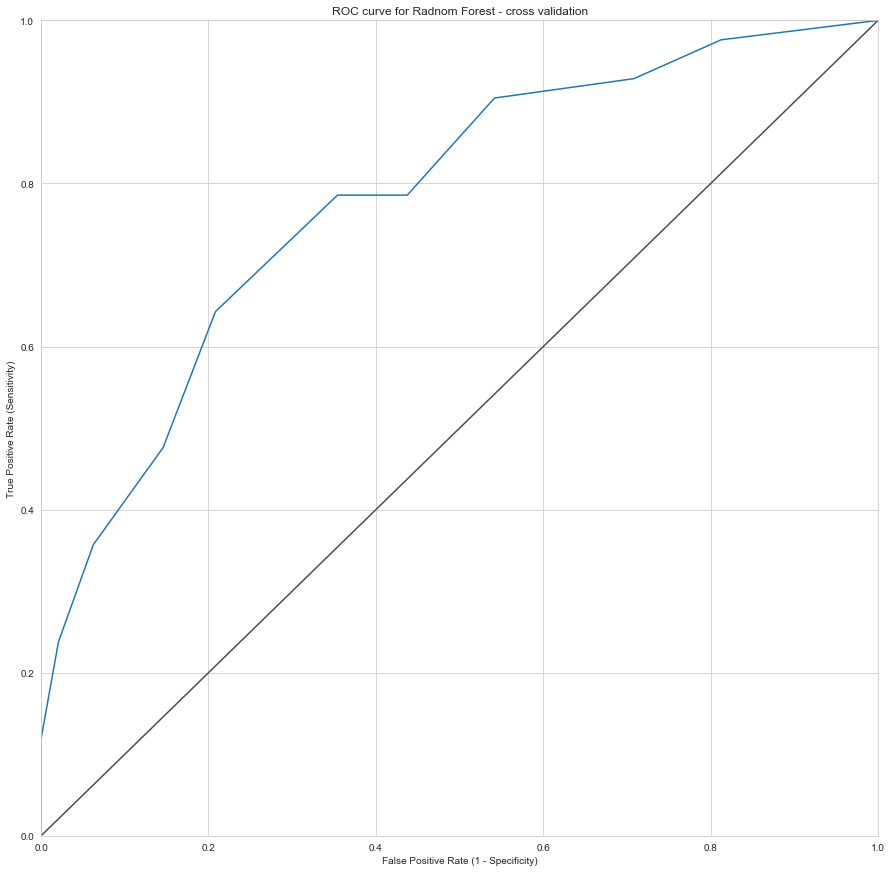

AUC Score : 0.7807539682539681


In [292]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Radnom Forest - cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

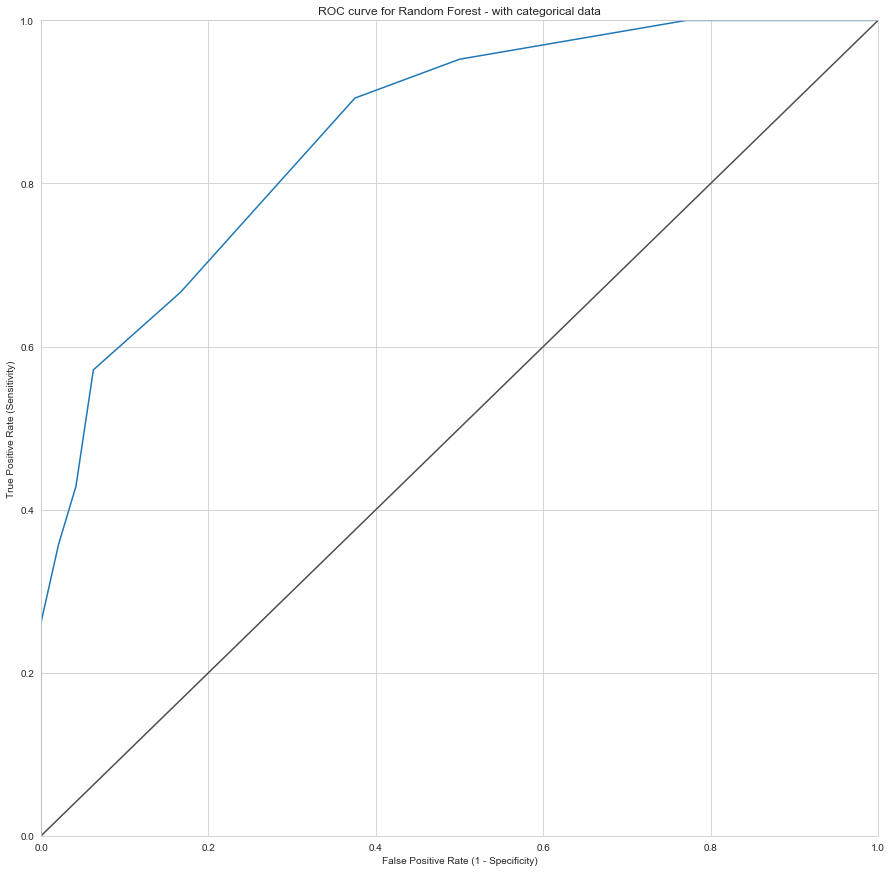

AUC Score : 0.8628472222222222


In [297]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y1_test, y_pred_quant_RFC_1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Random Forest - with categorical data', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

### Support Vector Machines

In [381]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC = SVC(probability=True, kernel="rbf")
model_SVC = SVC.fit(X_train,y_train)
prediction_SVC = model_SVC.predict(X_test)
y_pred_quant_SVC = model_SVC.predict_proba(X_test)[:, 1]

In [382]:
print(accuracy_score(y_test,prediction_SVC))
confusion_matrix(y_test, prediction_SVC)

0.8


array([[39,  9],
       [ 9, 33]], dtype=int64)

####  Validation Curve

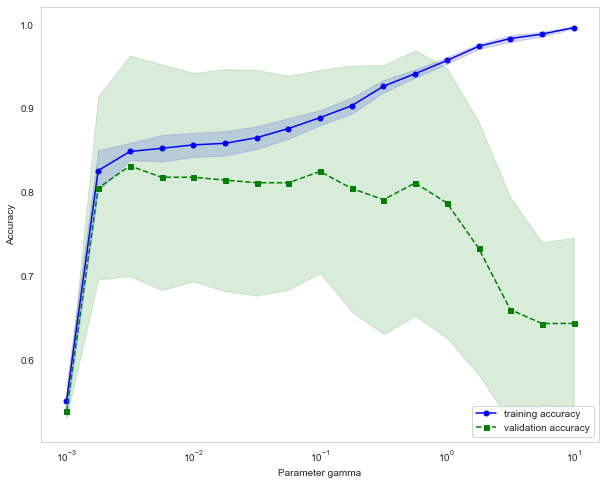

In [311]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name="gamma"
cv = StratifiedKFold(10)
param_range = np.logspace(-3, 1, 17)

train_scores, valid_scores = validation_curve(SVC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=8
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter gamma')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross validation

Точност-score RFC: 0.86
Прецизност SVC: 0.81
Чувствителност SVC: 0.62
F1 SVC: 0.70


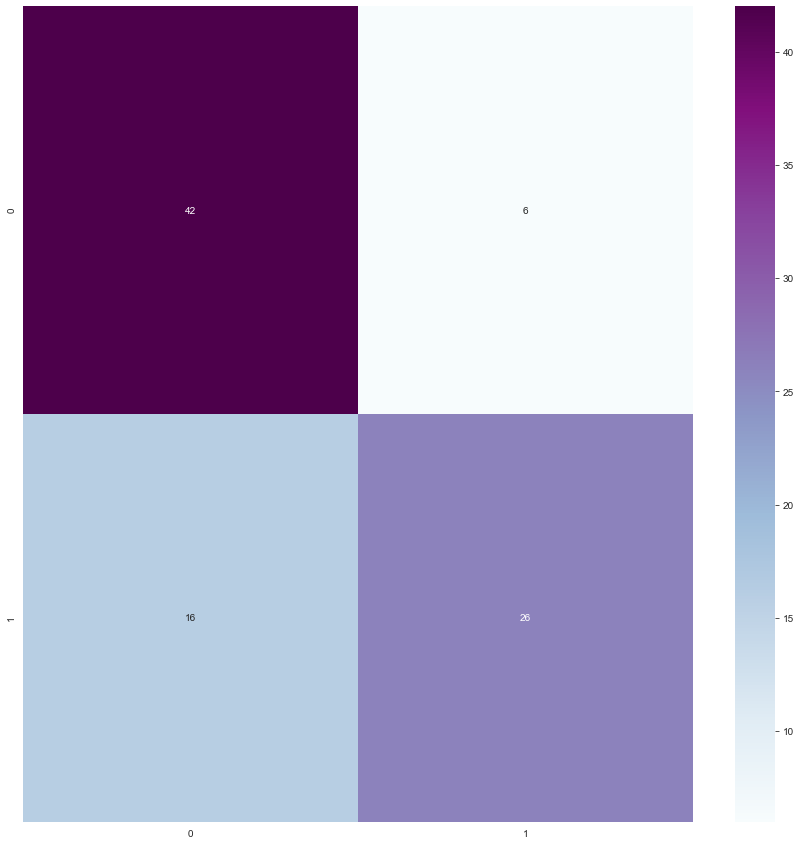

In [313]:
score_SVC = cross_val_score(SVC, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC.mean()))
y_SVC_pred = cross_val_predict(SVC, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred)
print("F1 SVC: %0.2f" % f1_SVC)

#### Learning Curve

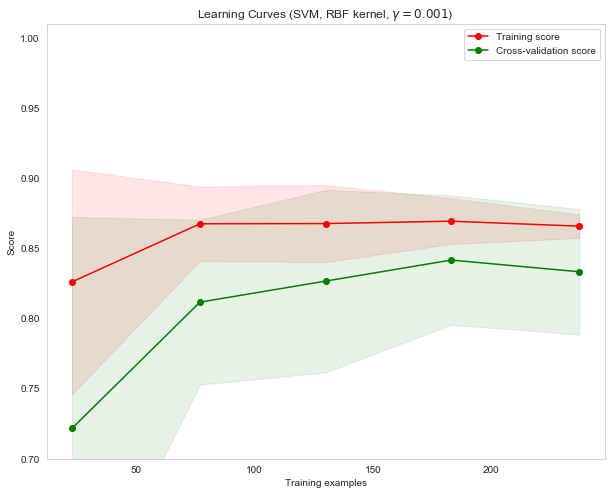

In [321]:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### ROC Curve

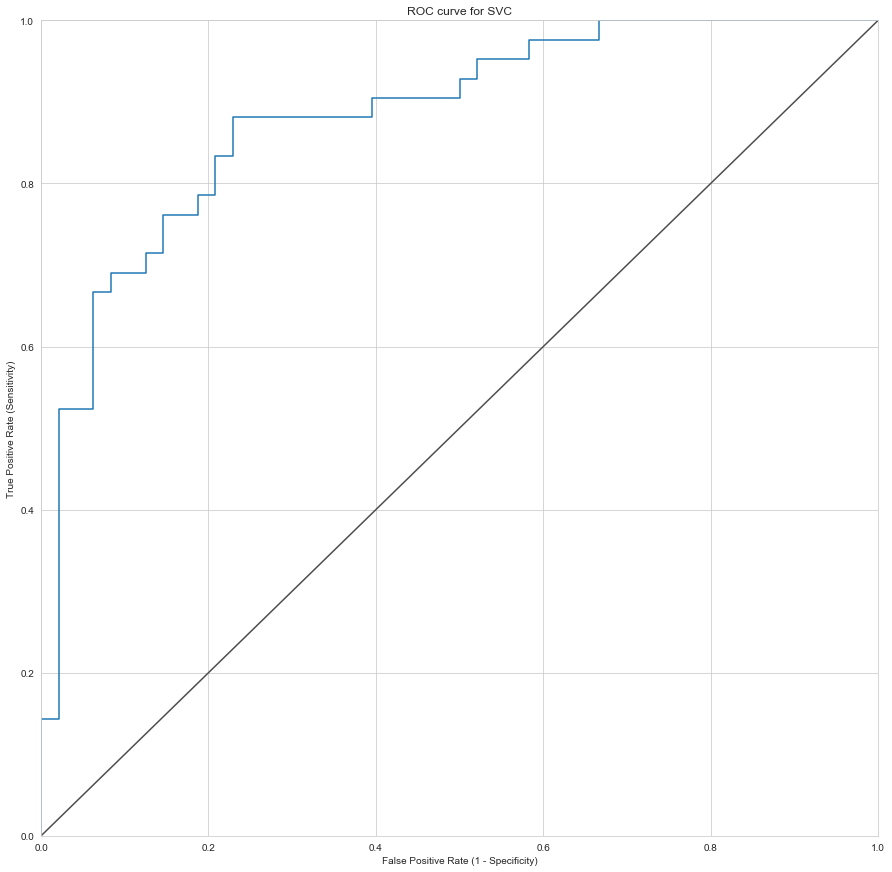

AUC Score : 0.8824404761904762


In [384]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

### Компарација на резултати

In [388]:
X_final=["kNN", "NB", "LR", "DTC", "RFC", "SVC"]
y_final= [0.864583, 0.867063, 0.876984, 0.696428, 0.863591, 0.882440]

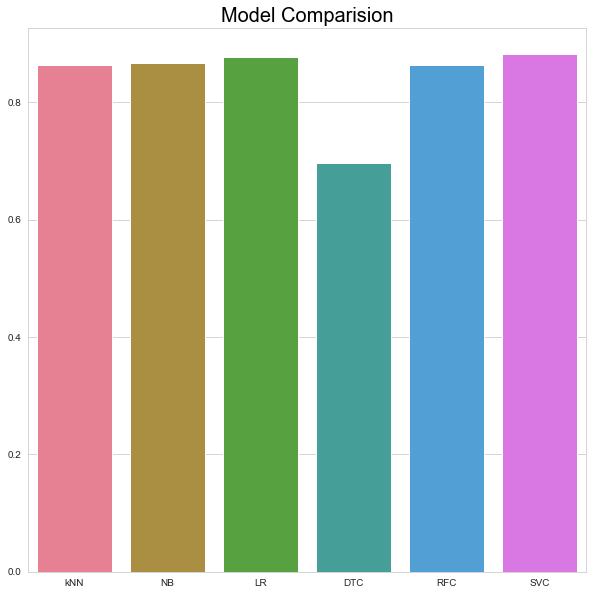

In [395]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final,y=y_final, palette='husl')
plt.xticks()
plt.title('Model Comparision',color = 'black',fontsize=20);